<a href="https://colab.research.google.com/github/vadim-privalov/Neiroset_Novosibirsk/blob/main/%D0%9B%D0%B5%D0%B3%D0%BA%D0%BE%D0%B5_%D1%80%D0%B0%D1%81%D0%BF%D0%BE%D0%B7%D0%BD%D0%B0%D0%B2%D0%B0%D0%BD%D0%B8%D0%B5_%D1%82%D0%B5%D0%BA%D1%81%D1%82%D0%B0_%D0%BF%D1%80%D0%B8_%D0%BF%D0%BE%D0%BC%D0%BE%D1%89%D0%B8_EasyOCR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Легкое распознавание текста при помощи EasyOCR 


# Easy text recognition with EasyOCR 


В этом уроке будем учиться распознавать текст в разы быстрее эффективнее и проще,чем мы умели до этого. В этом нам поможет библиотека EasyOCR. 


In this lesson we will learn to recognize text many times faster and easier than we were able to before. The EasyOCR library will help us with this. 


> **EasyOCR** - это пакет Python, который позволяет разработчикам компьютерного зрения легко выполнять оптическое распознавание символов.  

На момент написания этого урока EasyOCR может распознавать текст более чем на 80 языках! 



> **EasyOCR** is a Python package that allows computer vision developers to easily perform optical character recognition.  

As of this tutorial, EasyOCR can recognize text in over 80 languages! 



Для установки **EasyOCR** локально рекомендуется создат новую среду Python, чтобы избежать конфликтов  другими установками. 


To install **EasyOCR** locally it is recommended to create a new Python environment to avoid conflicts with other installations. 

In [1]:
# установим и распакуем архив
# install and unpack the archive
!wget http://dataudt.ru/datasets/cv/Lesson_08.EasyOCR.zip
!unzip -qq Lesson_08.EasyOCR.zip
%cd EasyOCR

--2022-02-09 06:47:07--  http://dataudt.ru/datasets/cv/Lesson_08.EasyOCR.zip
Resolving dataudt.ru (dataudt.ru)... 37.228.117.130
Connecting to dataudt.ru (dataudt.ru)|37.228.117.130|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 627353 (613K) [application/zip]
Saving to: ‘Lesson_08.EasyOCR.zip’

Lesson_08.EasyOCR.z 100%[===================>] 612.65K   995KB/s    in 0.6s    

2022-02-09 06:47:08 (995 KB/s) - ‘Lesson_08.EasyOCR.zip’ saved [627353/627353]

/content/EasyOCR


In [4]:
# установим необходимые пакеты 
# install the necessary packages 
!pip install opencv-python # заметьте: *не* opencv-contrib-python
                           # notice: *not* opencv-contrib-python
!pip install pyyaml
!pip install easyocr


In [6]:
pip uninstall opencv-python-headless==4.5.5.62

Found existing installation: opencv-python-headless 4.5.5.62
Uninstalling opencv-python-headless-4.5.5.62:
  Would remove:
    /usr/local/lib/python3.7/dist-packages/cv2/*
    /usr/local/lib/python3.7/dist-packages/opencv_python_headless-4.5.5.62.dist-info/*
    /usr/local/lib/python3.7/dist-packages/opencv_python_headless.libs/libavcodec-64ac49e1.so.58.91.100
    /usr/local/lib/python3.7/dist-packages/opencv_python_headless.libs/libavformat-4b79e479.so.58.45.100
    /usr/local/lib/python3.7/dist-packages/opencv_python_headless.libs/libavutil-805734e8.so.56.51.100
    /usr/local/lib/python3.7/dist-packages/opencv_python_headless.libs/libbz2-a273e504.so.1.0.6
    /usr/local/lib/python3.7/dist-packages/opencv_python_headless.libs/libcrypto-018b8c17.so.1.1
    /usr/local/lib/python3.7/dist-packages/opencv_python_headless.libs/libgfortran-91cc3cb1.so.3.0.0
    /usr/local/lib/python3.7/dist-packages/opencv_python_headless.libs/libopenblas-r0-f650aae0.3.3.so
    /usr/local/lib/python3.7/dist

In [7]:
pip install opencv-python-headless==4.5.2.52

     |████████████████████████████████| 38.2 MB 1.3 MB/s 


In [8]:
# импортируем необходимые пакеты
# import the necessary packages
from google.colab.patches import cv2_imshow
from easyocr import Reader
import cv2
from pylab import rcParams
import matplotlib.pyplot as plt

In [12]:
# создадим отдельный словарь с аргументами 
# create a separate dictionary with arguments 
args = {
  "image" : "/content/EasyOCR/images/street.jpg", # изображение, на котором мы будем искать текст
                                                # the image on which we are going to look for text 
  "langs": "ru,en", # язык, который мы будем использовать (можно указывать несколько через запятую без пробелов)
                    # the language we will use (you can specify more than one comma separated without spaces)
  "gpu": 0, # следует ли использовать графический процессор (если нет, то -1)
            # whether to use a graphics processor (if not, -1)
}

In [13]:
# напишем дополнительную функцию для очистки текста
# write an additional function to clear the text
def cleanup_text(text):
    # вырезаем не-ASCII текст, чтобы мы могли нарисовать его на изображении 
    # с помощью OpenCV
    # strip out non-ASCII text so we can draw the text on the image
	# using OpenCV
	return "".join([c if (ord(c) < 128)  or ((ord(c) > 1039) and (ord(c) < 1104))  else "" for c in text]).strip()


Using CPU. Note: This module is much faster with a GPU.


[INFO] OCR uses the following languages: ['ru', 'en']
[INFO] Input image...
[INFO] 0.9826: 48
[INFO] 0.3588: ПРОСПЕКТ
[INFO] 0.9933: КАРЛА
[INFO] 0.4992: MAPKCA


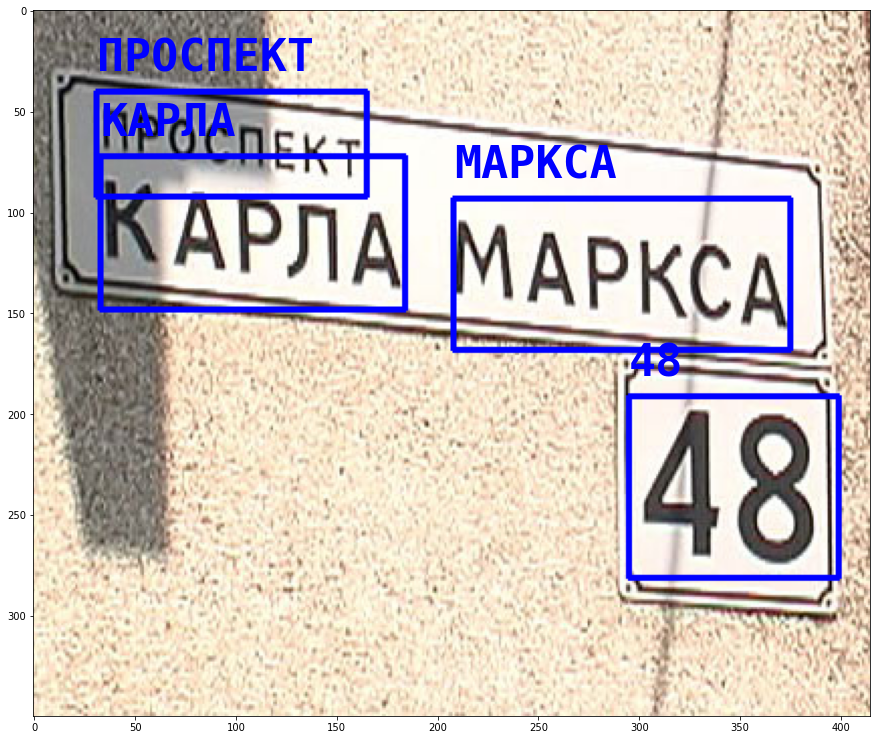

In [14]:
# передаем в качестве списка аргументы модели 
# break the input languages into a comma separated list
langs = args["langs"].split(",")
print("[INFO] OCR uses the following languages: {}".format(langs))

# загружаем изображение
# load the input image from disk
image = cv2.imread(args["image"])

# применяем EasyOCR для нахождения текста 
# OCR the input image using EasyOCR
print("[INFO] Input image...")
reader = Reader(langs, gpu=args["gpu"] > 0)
results = reader.readtext(image)

plt.figure(figsize=(15,15))

font = {'family' : 'monospace',
        'weight' : 'bold',
        'fontsize'   : 45} 

# проходимся по всем полученным результатам 
# loop over the results
for (bbox, text, prob) in results:
    # отображаем распознанный текст
    # и связанную с ним вероятность
    # display the OCR'd text and associated probability

    print("[INFO] {:.4f}: {}".format(prob, text))

    # распаковываем ограничивающую рамку
    # unpack the bounding box
    (tl, tr, br, bl) = bbox
    tl = (int(tl[0]), int(tl[1]))
    tr = (int(tr[0]), int(tr[1]))
    br = (int(br[0]), int(br[1]))
    bl = (int(bl[0]), int(bl[1]))

    # очищаем текст и рисуем рамку с текстом
    # cleanup the text and draw the box surrounding the text along
    # with the OCR'd text itself
    text = cleanup_text(text)
    cv2.rectangle(image, tl, br, (255, 0, 0), 2)

    plt.text(tl[0], tl[1] - 10, text, color=(0, 0, 1), **font) 

image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)
plt.show()